# Economic Stocks Plot

I retrieved stock prices from Yahoo Finance and generated different plots in Python and R ggplot gganimate

In [1]:
import math
import pandas as pd
import numpy as np
import pandas 
import matplotlib.pyplot as plt

In [2]:
pip install pandas-datareader

In [3]:
from pandas_datareader import data, wb

In [4]:
import datetime

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime.datetime(1970, 1, 1)

In [7]:
end = datetime.datetime(2021, 4, 2)

In [8]:
import pandas_datareader.data as web

### S&P 500 index 

- measures the stock performance of the fortune 500 companies that are listed in the USA on NYSE, NASDAQ, etc.

- calculated using the formula: $\frac{\sum{P_{i}\times Q_{i}}}{d}$ where $P_{i}$ = price of the i-th stock in the index and $Q_{i}$ = number of shares publicly available for the i-th stock, divided by a normalization factor d.

In [9]:
sp500 = web.DataReader("^GSPC", 'yahoo', start, end)
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-26,3978.189941,3917.120117,3917.120117,3974.540039,5467850000,3974.540039
2021-03-29,3981.830078,3943.250000,3969.310059,3971.090088,4619840000,3971.090088
2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049
2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893
2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117


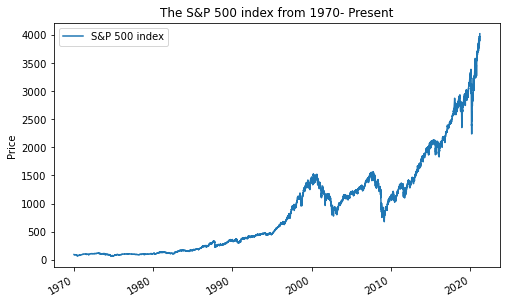

In [10]:
sp500['Adj Close'].plot(figsize=(8,5), label='S&P 500 index')

plt.xlabel('')
plt.ylabel('Price')
plt.title('The S&P 500 index from 1970- Present')
plt.legend(loc="")
plt.show()

The graph above shows closing price history & milestones of the S&P 500 index:

- On October 10, 2002, during the stock market downturn of 2002, S&P 500 index fell to 768.83, about 50% from its high in March 2000.

- On Sept 29, 2008, the S&P 500 index had its biggest one-day point drop 8.8 % to 1106.42

- On March 9, 2020, the S&P 500 had reach 2,972.37, its worst day since Sept 29, 2008

- On April 1, 2021, the S&P 500 index, led by technology stocks, reachest its highest 4,019.87 in 38 years - a new record!



Trends using moving averages:


In [11]:
#moving_averages
sp500['42d'] = sp500['Close'].rolling(window=422).mean()
sp500['252d'] = sp500['Close'].rolling(window=252).mean()

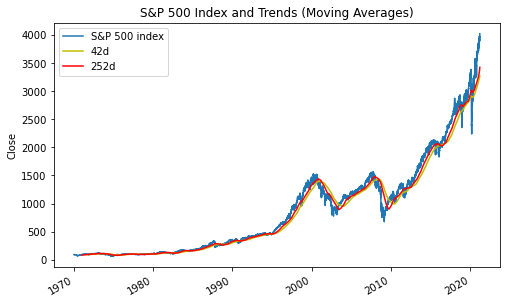

In [12]:
sp500['Adj Close'].plot(figsize=(8,5), label='S&P 500 index')
sp500['42d'].plot(color ='y')
sp500['252d'].plot(color ='r')

plt.xlabel('')
plt.ylabel('Close')
plt.title('S&P 500 Index and Trends (Moving Averages)')
plt.legend(loc="")
plt.show()

*Trends (moving average) are particularly useful in stock trading*

In [13]:
#log returns
sp500['Return'] = np.log(sp500['Close']/sp500['Close'].shift(1))

sp500.tail(3)

,High,Low,Open,Close,Volume,Adj Close,42d,252d,Return
Date,,,,,,,,,
2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049,3259.835734,3409.021672,-0.003163
2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893,3262.091468,3414.530799,0.003616
2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117,3264.476990,3420.679093,0.011756


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002368BDAD520>],
      dtype=object)

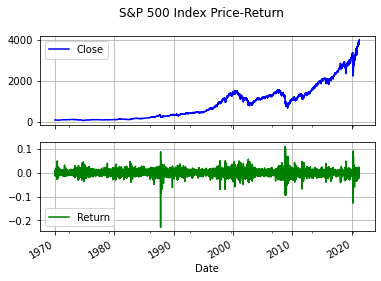

In [14]:
sp500[['Close','Return']].plot(kind='line', subplots=True, grid=True, title="S&P 500 Index Price-Return",
        layout=(2, 1), sharex=True, sharey=False, legend=True,style=['b','g'])

The graph above depicts relation between returns and index prices rising/falling.

Volatility = standard deviation of the log returns. Below we highlight the correlation btw the historical moving volatility and returns:
 
 - moving volatility tends	to	increase	when	markets	comes	down and decrease	when they	rises

In [15]:
#Moving Annual Volatility
sp500['Mov_Volatility'] = sp500['Return'].rolling(window=252).std()* math.sqrt(252)
sp500.tail(3)

,High,Low,Open,Close,Volume,Adj Close,42d,252d,Return,Mov_Volatility
Date,,,,,,,,,,
2021-03-30,3968.010010,3944.350098,3963.340088,3958.550049,4103570000,3958.550049,3259.835734,3409.021672,-0.003163,0.213147
2021-03-31,3994.409912,3966.979980,3967.250000,3972.889893,4564980000,3972.889893,3262.091468,3414.530799,0.003616,0.212407
2021-04-01,4020.629883,3992.780029,3992.780029,4019.870117,4151240000,4019.870117,3264.476990,3420.679093,0.011756,0.207368


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002368BB08D00>],
      dtype=object)

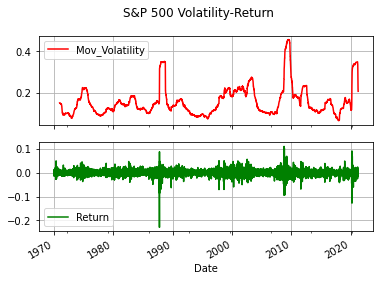

In [16]:
sp500[['Mov_Volatility','Return']].plot(kind='line', subplots=True, grid=True, title="S&P 500 Volatility-Return ",
        layout=(2, 1), sharex=True, sharey=False, legend=True,style=['r','g'])

*Historical volatility trends are particularly useful in Options trading*

Let's look @ other major indexes:

### The Dow Jones Industrial Average

Dow stock market index measures the stock performance of 30 large companies listed on stock exchanges in the US

In [22]:
dow = web.DataReader("^DJI", 'yahoo', start, end)
dow.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-30,33170.929688,32988.921875,33127.878906,33066.960938,3075100,33066.960938
2021-03-31,33173.769531,32980.570312,33116.039062,32981.550781,4141400,32981.550781
2021-04-01,33167.171875,32985.351562,33054.578125,33153.210938,3118800,33153.210938


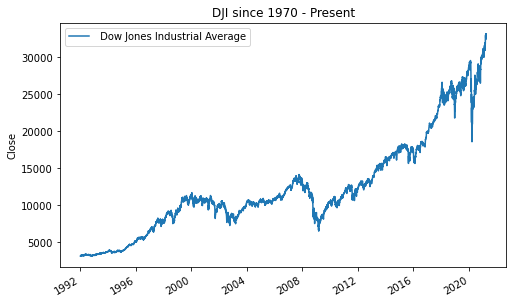

In [23]:
dow['Adj Close'].plot(figsize=(8,5), label=' Dow Jones Industrial Average')

plt.xlabel('')
plt.ylabel('Close')
plt.title('DJI since 1970 - Present')
plt.legend(loc="")
plt.show()

### Nasdaq Composite Index

NASDAQ includes almost all stocks listed on the Nasdaq stock market. NASDAQ Composite is heavily weighted towards companies in the information technology sector.


Along with the Dow Jones Industrial Average & S&P 500 Index, it is one the most-followed stock market indexes in the US. 


In [24]:
nasdaq = web.DataReader("^IXIC", 'yahoo', start, end)
nasdaq.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-30,13075.750000,12922.570312,13008.799805,13045.389648,4685320000,13045.389648
2021-03-31,13325.540039,13118.379883,13122.570312,13246.870117,4980670000,13246.870117
2021-04-01,13487.080078,13404.179688,13414.320312,13480.110352,4553470000,13480.110352


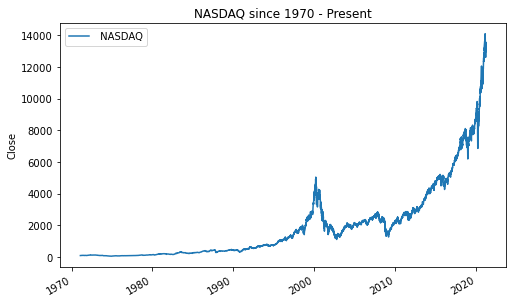

In [25]:
nasdaq ['Adj Close'].plot(figsize=(8,5), label=' NASDAQ')

plt.xlabel('')
plt.ylabel('Close')
plt.title('NASDAQ since 1970 - Present')
plt.legend(loc="")
plt.show()

The graphs depicts the closing milestone of these two major indexes on Sept 29, 2008:

- the Dow Jones Industrial Average ends at 10365.45 - its biggest one-day point drop ever and  had its biggest one-day point drop

- Nasdaq Composite Index falled to 1983.73 - its biggest one-day point decline since 2000.

On April 1, 2021, the Dow rose to 33,153.21 and the Nasdaq rose to 13,480.11.

### Major Economic Stock Indexes from 2015 to Present:

In [26]:
start = datetime.datetime(2015, 1, 1)

dow = web.DataReader("^DJI", 'yahoo', start, end)
nasdaq = web.DataReader("^IXIC", 'yahoo', start, end)
nyse = web.DataReader("^NYA", 'yahoo', start, end)

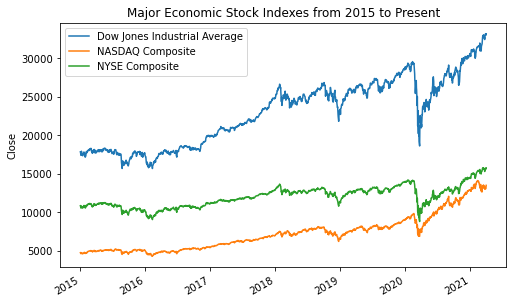

In [27]:
dow['Close'].plot(figsize=(8,5), label='Dow Jones Industrial Average')
nasdaq['Close'].plot(figsize=(8,5), label="NASDAQ Composite")
nyse['Close'].plot(figsize=(8,5), label = "NYSE Composite")

plt.xlabel('')
plt.ylabel('Close')
plt.title('Major Economic Stock Indexes from 2015 to Present')
plt.legend(loc="")
plt.show()

See the animated plot of the same economic stocks on March 14, 2020

In [118]:
from PIL import Image, ImageSequence
im = Image.open("EconomicStocks.gif")  
im.show()